# **Basic Imports**

In [1]:
import warnings

# Suppress all FutureWarnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv("../Data/Processed/cleaned_data.csv")

In [4]:
data.columns

Index(['Unnamed: 0', 'id', 'season', 'city', 'date', 'player_of_match',
       'venue', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner',
       'result', 'result_margin', 'target_runs', 'target_overs', 'super_over',
       'umpire1', 'umpire2'],
      dtype='object')

# **Team Toss Data**

In [5]:
toss_data = data.iloc[:,[1,2,3,6,7,8,9,10,11]]
toss_data_grouped = toss_data.groupby("season")

# **Team Toss Percentage**

In [6]:
def team_toss_percentage(year,team):
    #(no of toss won)/(total no of matches played)
    a = toss_data_grouped.get_group(year).iloc[:,4].value_counts()[team]
    b = toss_data_grouped.get_group(year).iloc[:,5].value_counts()[team]
    c = a+b
    d = toss_data_grouped.get_group(year).iloc[:,-3].value_counts()[team]
    print(d)
    return ((d/c)*100)
team_toss_percentage("2009","CSK")

7


50.0

# **Team Match Win Percentage After Toss Win**

In [7]:
def team_match_win_rate_after_toss_win(year,team):
    a = toss_data_grouped.get_group(year).groupby("toss_winner").get_group(team).value_counts("winner")[team]
    b = toss_data_grouped.get_group(year).iloc[:,-3].value_counts()[team]
    c = print("In {}, {} won {} toss out of which they won {} matches".format(year,team,b,a)) 
    return (c)

team_match_win_rate_after_toss_win("2009","CSK")

In 2009, CSK won 7 toss out of which they won 4 matches


# **Team Decision After Toss Won**

In [8]:
def team_decision_after_toss_win(year,team):
    a = toss_data_grouped.get_group(year).groupby("toss_winner").get_group(team).value_counts("toss_decision")["bat"]
    b = toss_data_grouped.get_group(year).groupby("toss_winner").get_group(team).value_counts("toss_decision")["field"]
    c = toss_data_grouped.get_group(year).iloc[:,-3].value_counts()[team]
    print("Team {} won {} times in {} and choose batting: {} percent and bowling :{} percent times".format(team,c,year,((a/c)*100),((b/c)*100)))
    # print((b/c)*100)

team_decision_after_toss_win("2009","RCB")

Team RCB won 8 times in 2009 and choose batting: 62.5 percent and bowling :37.5 percent times


# **After decision win percentage**

In [9]:
def team_decision_after_toss_win(year,team):
    batted = toss_data_grouped.get_group(year).groupby("toss_winner").get_group(team).value_counts("toss_decision")["bat"]
    fielded = toss_data_grouped.get_group(year).groupby("toss_winner").get_group(team).value_counts("toss_decision")["field"]
    batted_win = toss_data_grouped.get_group(year).groupby("toss_winner").get_group(team).groupby("toss_decision").get_group("bat").value_counts("winner")[team]
    fielded_win = toss_data_grouped.get_group(year).groupby("toss_winner").get_group(team).groupby("toss_decision").get_group("field").value_counts("winner")[team]
    print("The team {} in {} won and took batting {} times and won the game {} times so the percentages are {}".format(team,year,batted,batted_win,((batted_win/batted)*100)))
    print("The team {} in {} won and took fielding {} times and won the game {} times so the percentages are {}".format(team,year,fielded,fielded_win,((fielded_win/fielded)*100)))

team_decision_after_toss_win("2009","RCB")

The team RCB in 2009 won and took batting 5 times and won the game 3 times so the percentages are 60.0
The team RCB in 2009 won and took fielding 3 times and won the game 2 times so the percentages are 66.66666666666666


# **Team Toss Win Venue**

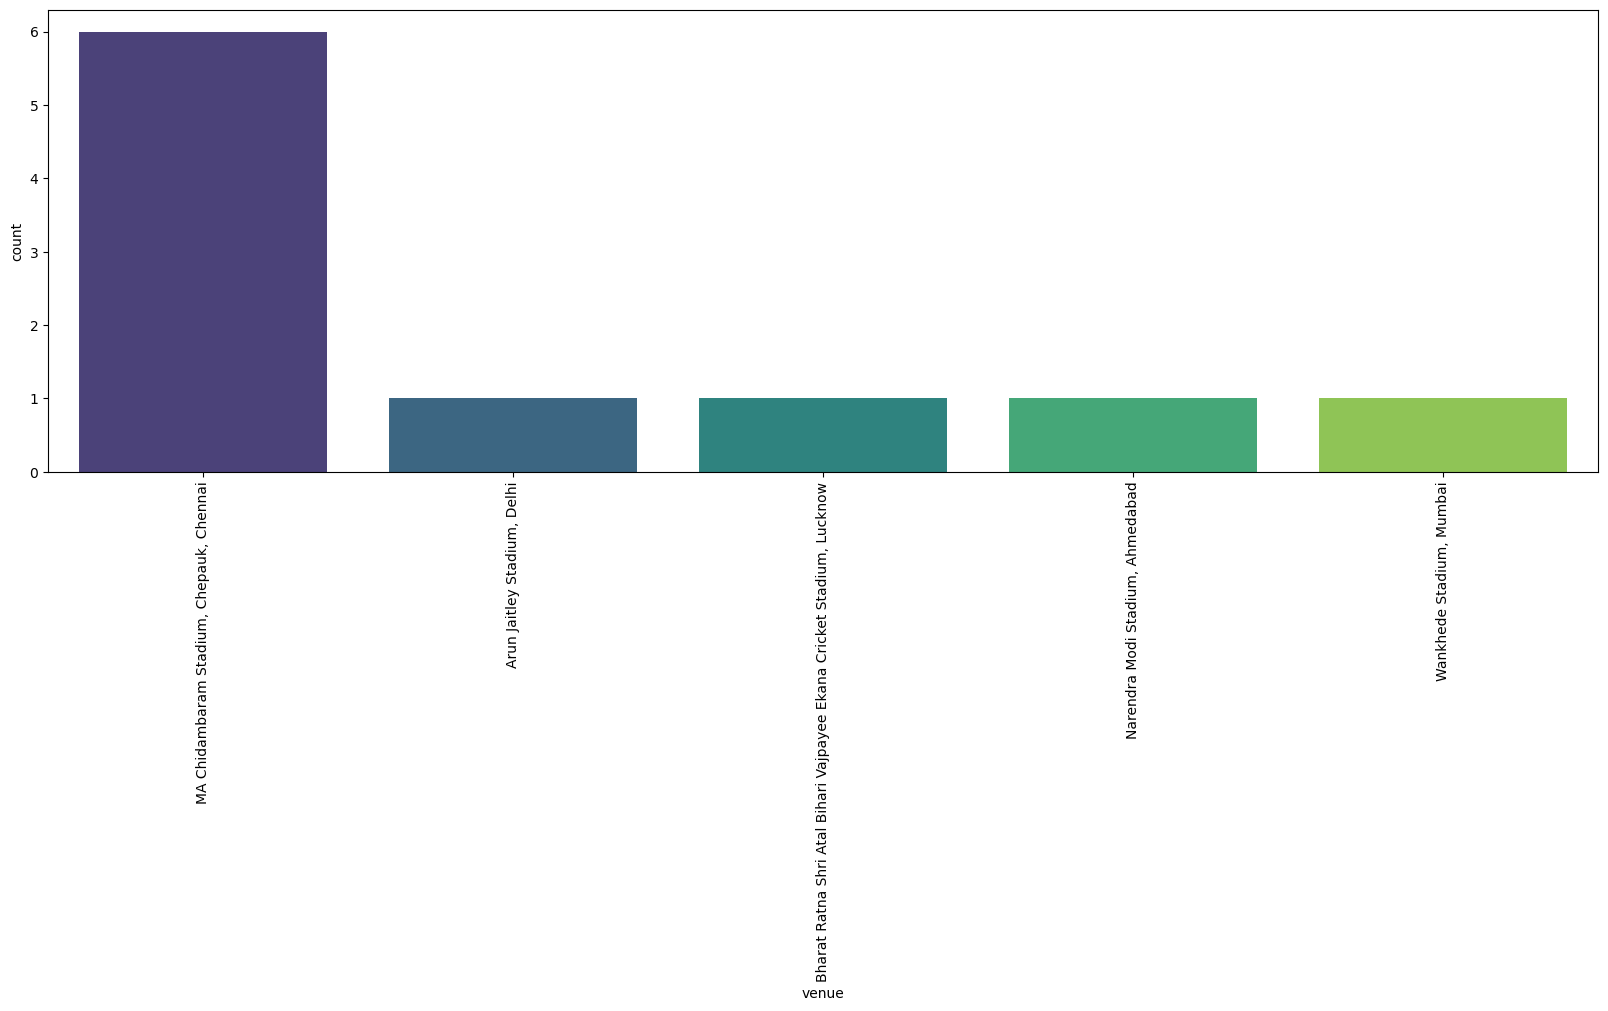

In [10]:
import seaborn as sns
from matplotlib import pyplot as plt

def team_toss_win_at_venues(year, team):
    plt.figure(figsize=(20,6))
    a = toss_data_grouped.get_group(year).groupby("toss_winner").get_group(team).value_counts("venue").reset_index()
    sns.barplot(data=a, x="venue", y='count', palette='viridis')
    plt.xticks(rotation=90)
    plt.show()

team_toss_win_at_venues("2023", "CSK")

 - vennue -> bat or bowl when toss win
 - year wise -> decision stats

# **Bat and Bowl Percentage on a Venue**

In [11]:
def team_win_percentage_at_venue(venue,team):
    b = toss_data[toss_data["venue"]==venue]
    c = b[(b["team1"]== team) | (b["team2"]== team)]
    c1 = c.shape[0]
    d = c[c["winner"]== team].shape[0]
    print("Team {} played {} times on {} and won {} times.".format(team,c1,venue,d))
    print("Making the win percentage at {}: {}.".format(venue,((d/c1)*100)))

team_win_percentage_at_venue("M Chinnaswamy Stadium","RCB")

Team RCB played 61 times on M Chinnaswamy Stadium and won 29 times.
Making the win percentage at M Chinnaswamy Stadium: 47.540983606557376.


# **Bat and Bowl Percentage on a Venue by Year**

In [12]:
def team_win_percentage_at_venue_by_year(venue,team,year):
    b = toss_data[(toss_data["venue"]==venue) & (toss_data["season"]==year)]
    c = b[(b["team1"]== team) | (b["team2"]== team)]
    c1 = c.shape[0]
    d = c[c["winner"]== team].shape[0]
    print("Team {} played {} times on {} and won {} times in {} season.".format(team,c1,venue,d,year))
    print("Making the win percentage at {}: {} in {} season.".format(venue,((d/c1)*100),year))

team_win_percentage_at_venue_by_year("M Chinnaswamy Stadium","RCB","2009/10")

Team RCB played 7 times on M Chinnaswamy Stadium and won 4 times in 2009/10 season.
Making the win percentage at M Chinnaswamy Stadium: 57.14285714285714 in 2009/10 season.


# **Year winning graph**

In [13]:
a = toss_data[toss_data["winner"]=="CSK"]
b = pd.DataFrame(a.groupby("season").count()["winner"]).reset_index()

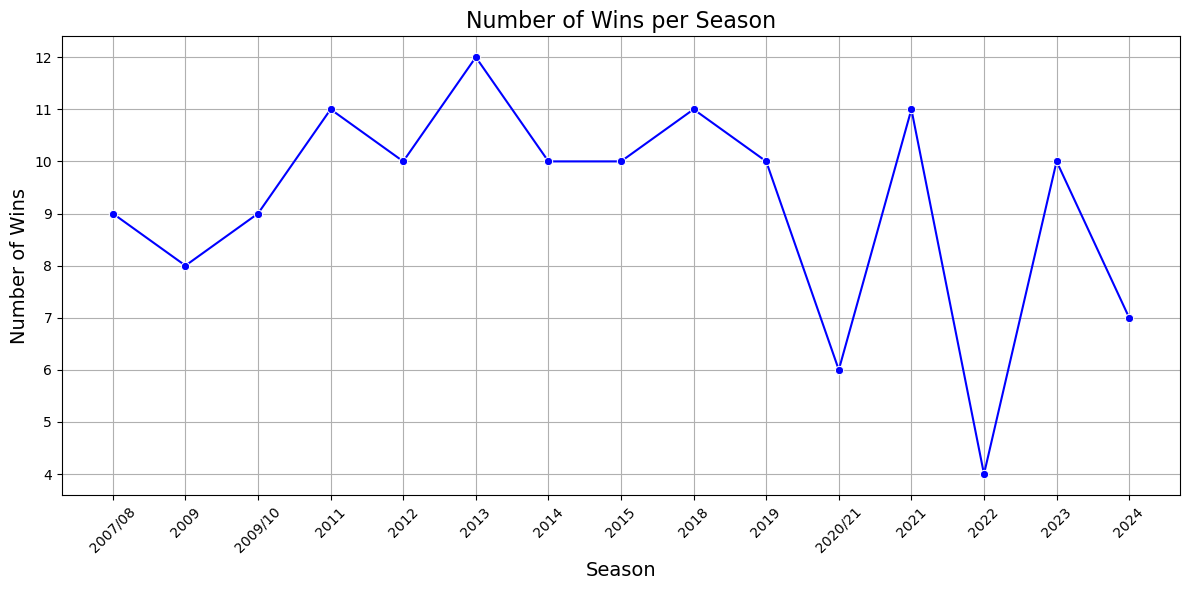

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

b['season'] = pd.Categorical(b['season'], categories=b['season'], ordered=True)

plt.figure(figsize=(12, 6))
sns.lineplot(data=b, x='season', y='winner', marker='o', color='b')

plt.xticks(rotation=45)
plt.title('Number of Wins per Season', fontsize=16)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Number of Wins', fontsize=14)
plt.grid(True)

plt.tight_layout()
plt.show()